# Draw Confusion Matrix
draw confusion martrix from saved .pt file.  
Notice: you should change the gait_cycle, sampling, and pref_path keyword first, then run all cells.

In [3]:
# dict for title/res path pair 
# running on pegasus
# 2025-06027 first run

pegasus = {
	"add":
		"/home/SKIING/chenkaixu/code/KnowledgeGuided-ASD_PyTorch/logs/3dcnn_attn_map_True_add_5/2025-06-27/10-34-53/best_preds",
	"mul":
		"/home/SKIING/chenkaixu/code/KnowledgeGuided-ASD_PyTorch/logs/3dcnn_attn_map_True_mul_5/2025-06-27/10-34-54/best_preds",
	"concat":
		"/home/SKIING/chenkaixu/code/KnowledgeGuided-ASD_PyTorch/logs/3dcnn_attn_map_True_concat_5/2025-06-27/10-34-54/best_preds",
	"avg":
		"/home/SKIING/chenkaixu/code/KnowledgeGuided-ASD_PyTorch/logs/3dcnn_attn_map_True_avg_5/2025-06-27/10-34-54/best_preds",
	"late":
		"/home/SKIING/chenkaixu/code/KnowledgeGuided-ASD_PyTorch/logs/3dcnn_attn_map_True_late_5/2025-06-27/10-34-54/best_preds",
	"none":
		"/home/SKIING/chenkaixu/code/KnowledgeGuided-ASD_PyTorch/logs/3dcnn_attn_map_True_none_5/2025-06-27/10-34-54/best_preds",
}



****************************************************************************************************
pegasus, add
fold: 5
****************************************************************************************************
add
accuracy: 0.7135
precision: 0.7551
recall: 0.7135
f1_score: 0.7112
auroc: 0.8274
confusion_matrix:
[[84.89749    5.3999424  9.70257  ]
 [29.970589  62.352943   7.6764703]
 [31.39394    1.7979798 66.80808  ]]
####################################################################################################


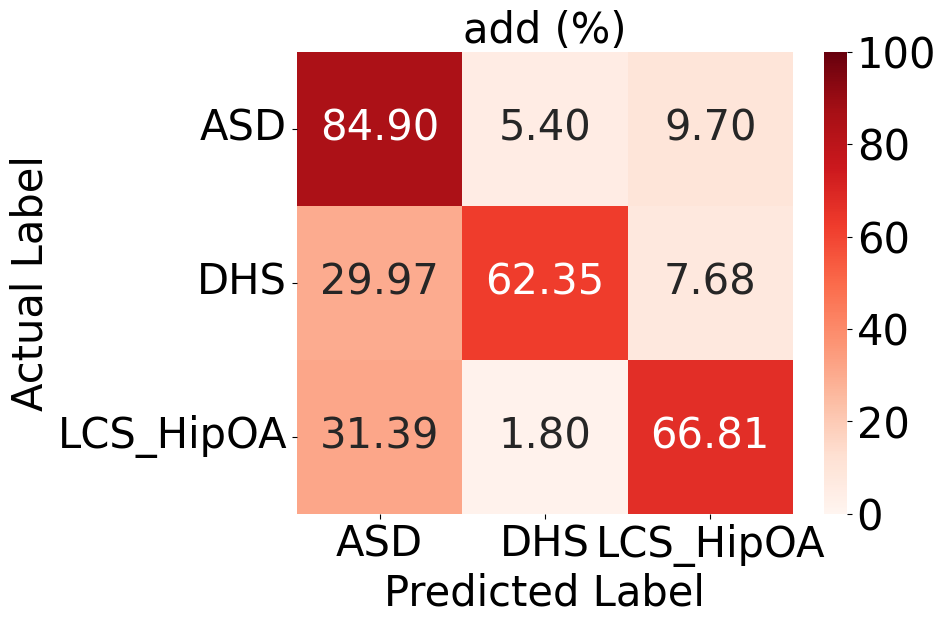

****************************************************************************************************
pegasus, mul
fold: 7
****************************************************************************************************
mul
accuracy: 0.4616
precision: 0.6141
recall: 0.4616
f1_score: 0.4441
auroc: 0.6801
confusion_matrix:
[[57.282173   0.4027984 42.31503  ]
 [39.45135   18.768503  41.780148 ]
 [37.08269    0.4750899 62.44222  ]]
####################################################################################################


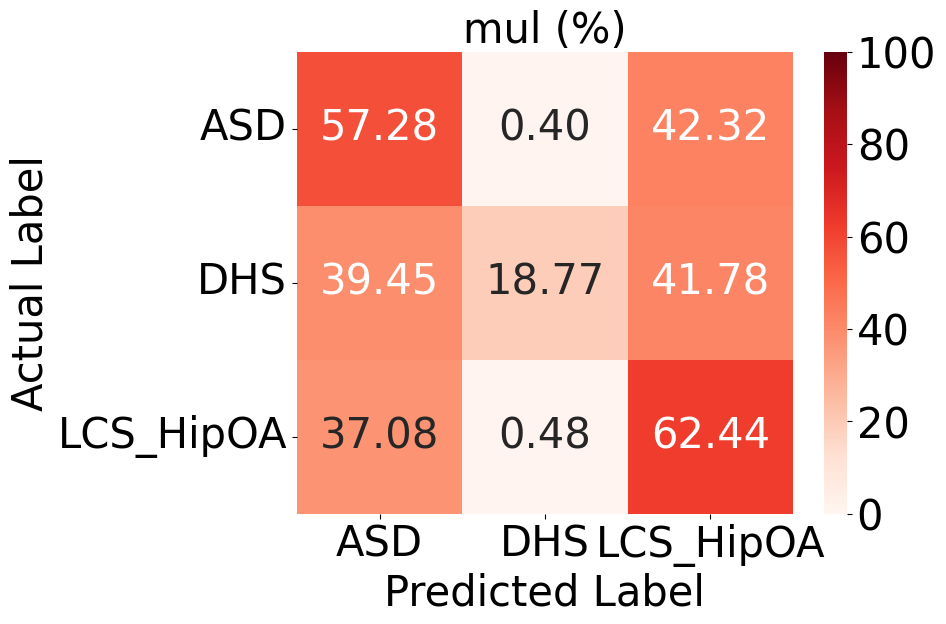

****************************************************************************************************
pegasus, concat
fold: 6
****************************************************************************************************
concat
accuracy: 0.6282
precision: 0.6588
recall: 0.6282
f1_score: 0.5976
auroc: 0.7534
confusion_matrix:
[[87.63989   7.610048  4.750062]
 [32.6866   58.342846  8.970555]
 [45.491802 12.027112 42.481087]]
####################################################################################################


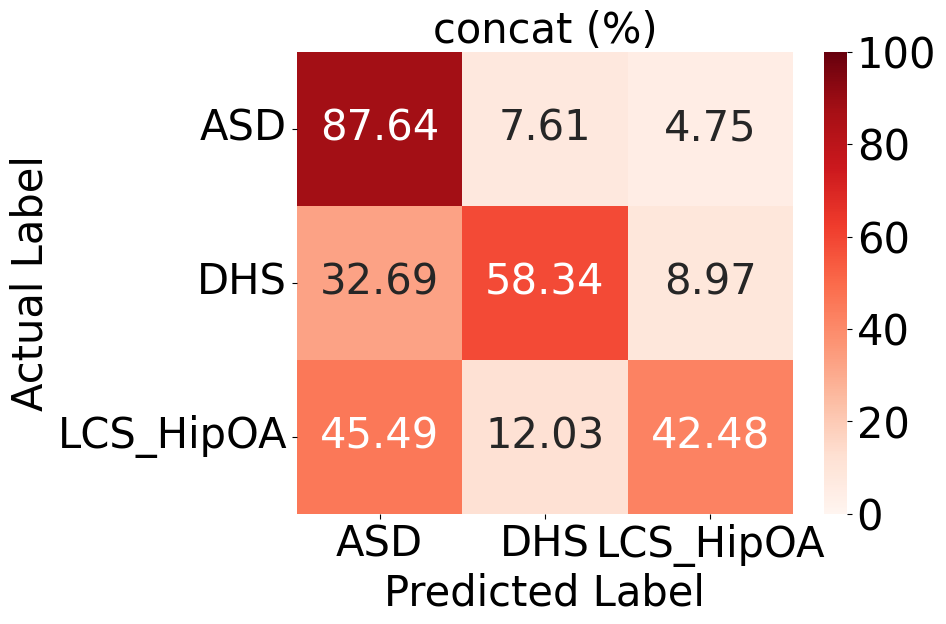

****************************************************************************************************
pegasus, avg
fold: 5
****************************************************************************************************
avg
accuracy: 0.6583
precision: 0.6618
recall: 0.6583
f1_score: 0.6488
auroc: 0.8232
confusion_matrix:
[[76.552124   4.504765  18.943113 ]
 [30.441177  62.97059    6.5882354]
 [24.969696  17.070707  57.9596   ]]
####################################################################################################


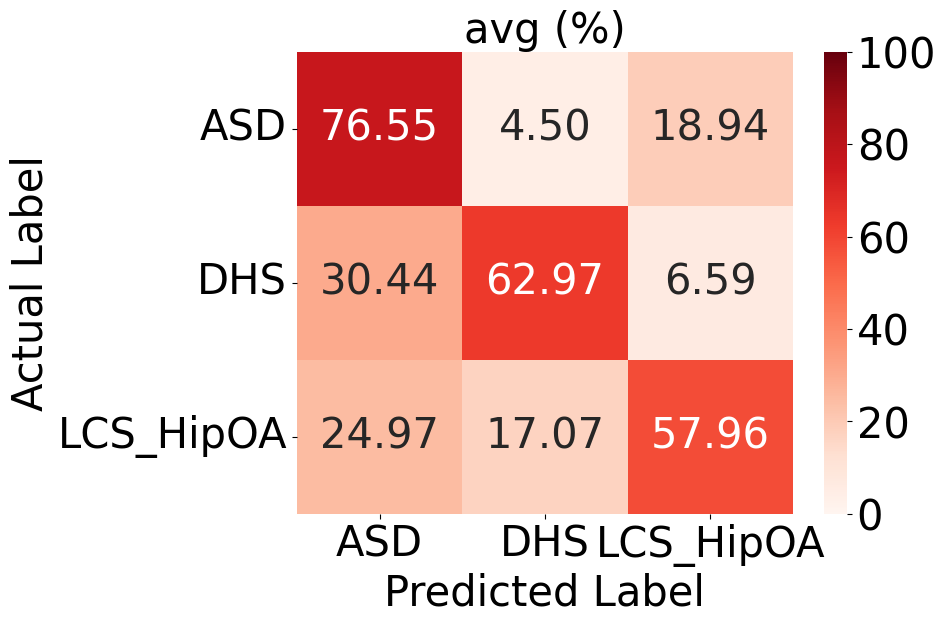

****************************************************************************************************
pegasus, late
fold: 5
****************************************************************************************************
late
accuracy: 0.6118
precision: 0.6646
recall: 0.6118
f1_score: 0.5866
auroc: 0.7784
confusion_matrix:
[[85.82154    4.3026276  9.875831 ]
 [40.14706   58.941174   0.9117647]
 [48.020203  13.21212   38.767677 ]]
####################################################################################################


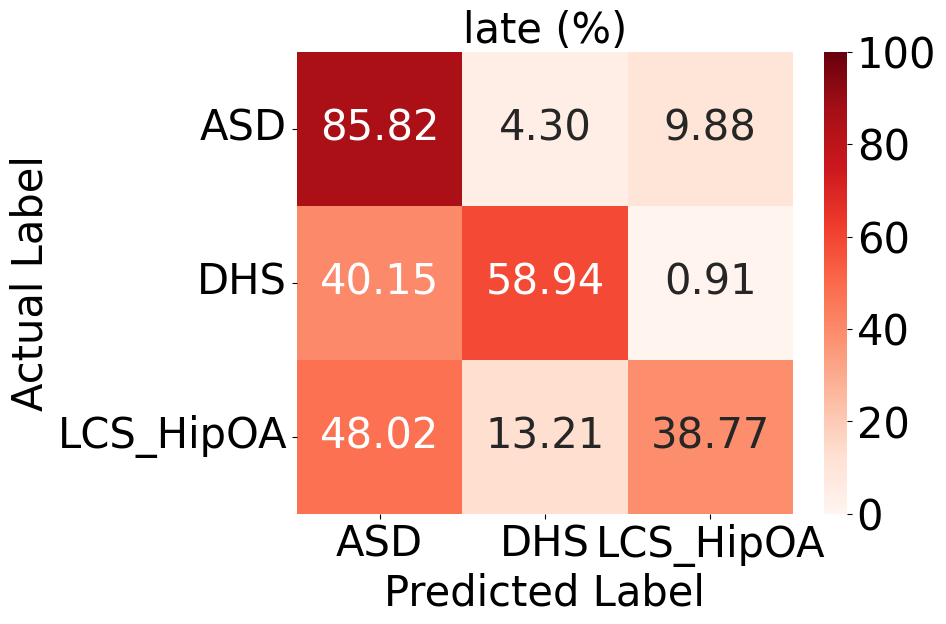

****************************************************************************************************
pegasus, none
fold: 4
****************************************************************************************************
none
accuracy: 0.6046
precision: 0.6418
recall: 0.6046
f1_score: 0.5866
auroc: 0.7862
confusion_matrix:
[[75.         4.299363  20.700636 ]
 [31.561703  63.087006   5.351292 ]
 [49.430264   7.2698264 43.299908 ]]
####################################################################################################


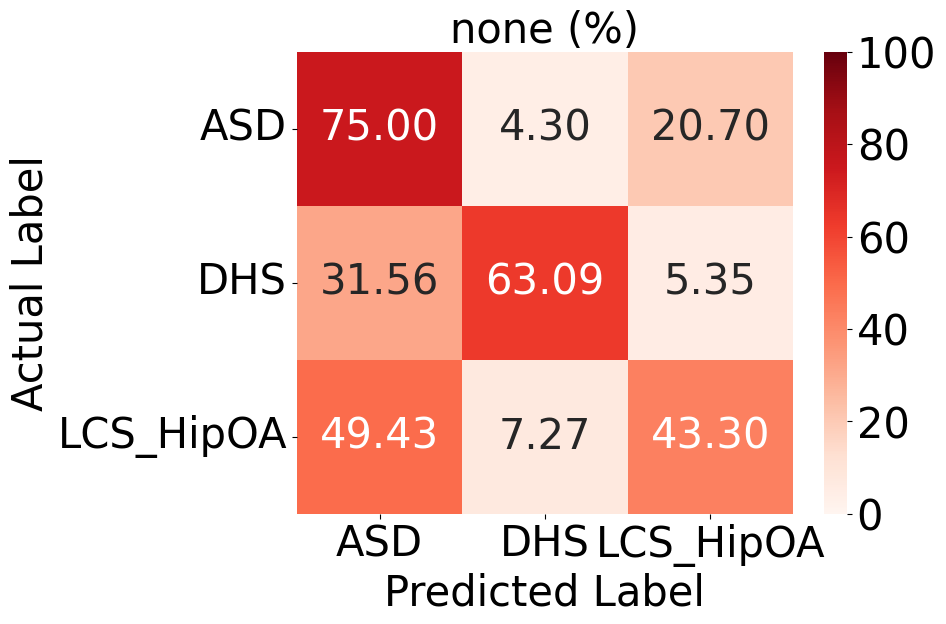

Summary of Metrics:
Model	Fold	accuracy	precision	recall	f1_score	auroc
add	5	0.7135283946990967	0.755057692527771	0.7135283946990967	0.7112087607383728	0.8273730874061584
mul	7	0.4616429805755615	0.6140696406364441	0.4616429805755615	0.44414839148521423	0.6801421046257019
concat	6	0.6282126903533936	0.6587917804718018	0.6282126903533936	0.5975845456123352	0.7533538937568665
avg	5	0.6582744121551514	0.661761999130249	0.6582744121551514	0.6488251686096191	0.8231515288352966
late	5	0.6117680072784424	0.6646155118942261	0.6117680072784424	0.5865828990936279	0.7784295082092285
none	4	0.604623019695282	0.6418017148971558	0.604623019695282	0.5865680575370789	0.786226749420166



In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch 
from pathlib import Path
import pandas as pd

from torchmetrics.classification import (
MulticlassAccuracy,
MulticlassPrecision,
MulticlassRecall,
MulticlassF1Score,
MulticlassConfusionMatrix,
MulticlassAUROC,
)

# analysis with title/res path pair

def analysis_with_title_res_path_pair(pair: dict, flag: str = "with_attn_loss"):

	summary_records = []
	
	for title, res_path in pair.items():
		
		fold = 0
		print('*' * 100)
		print(f"{flag}, {title}")
		all_label = []
		all_pred = []
		
		fold = int(len(list(Path(res_path).iterdir())) / 2 )

		print(f"fold: {fold}")

		for i in range(fold):
			label = torch.load(f"{res_path}/{i}_label.pt", map_location="cpu").to(torch.int)
			pred = torch.load(f"{res_path}/{i}_pred.pt", map_location="cpu")
			all_label.append(label)
			all_pred.append(pred)

		all_label = torch.cat(all_label, dim=0)
		all_pred = torch.cat(all_pred, dim=0)
		
		print('*' * 100)
		print(title)
		confusion_matrix_data, metric_dict = metrics(all_pred, all_label, num_class=3)
		print('#' * 100)

		# save summary records
		summary_row = {"Model": title, "Fold": fold}
		summary_row.update(metric_dict)
		summary_records.append(summary_row)

		plt.rcParams.update({'font.size': 30, 'font.family': 'sans-serif'})
		axis_labels = ['ASD', 'DHS', 'LCS_HipOA']

		# draw confusion matrix
		plt.figure(figsize=(8, 6))
		sns.heatmap(confusion_matrix_data, annot=True, fmt='.2f', cmap='Reds', xticklabels=axis_labels, yticklabels=axis_labels, vmin=0, vmax=100)
		# plt.title(f'{title} (%)', fontsize=30)
		plt.title(f"{title} (%)", fontsize=30)
		plt.ylabel('Actual Label', fontsize=30)
		plt.xlabel('Predicted Label', fontsize=30)
		plt.show()
    	
	df_summary = pd.DataFrame(summary_records)
	print("Summary of Metrics:")
	print(df_summary.to_csv(sep="\t", index=False))

def metrics(all_pred: torch.Tensor, all_label: torch.Tensor, num_class: int = 3):
    # define metrics
    _accuracy = MulticlassAccuracy(num_class)
    _precision = MulticlassPrecision(num_class)
    _recall = MulticlassRecall(num_class)
    _f1_score = MulticlassF1Score(num_class)
    _auroc = MulticlassAUROC(num_class)
    _confusion_matrix = MulticlassConfusionMatrix(num_class, normalize="true")

    accuracy = _accuracy(all_pred, all_label).item()
    precision = _precision(all_pred, all_label).item()
    recall = _recall(all_pred, all_label).item()
    f1 = _f1_score(all_pred, all_label).item()
    auroc = _auroc(all_pred, all_label).item()
    cm = _confusion_matrix(all_pred, all_label).cpu().numpy() * 100

    print(f"accuracy: {accuracy:.4f}")
    print(f"precision: {precision:.4f}")
    print(f"recall: {recall:.4f}")
    print(f"f1_score: {f1:.4f}")
    print(f"auroc: {auroc:.4f}")
    print(f"confusion_matrix:\n{cm}")

    metrics_dict = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "auroc": auroc,
    }

    return cm, metrics_dict

analysis_with_title_res_path_pair(pegasus, flag="pegasus")